# STEP 0: Use GPU

In [1]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

True

In [2]:
# Show the GPU info

!nvidia-smi
!nvidia-smi --query-gpu=name --format=csv,noheader

Thu Nov 25 10:08:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# STEP 1: Git clone your project

In [3]:
# Git clone your project

!git clone https://github.com/Nemo1999/NYCU_VRDL_HW2.git

Cloning into 'NYCU_VRDL_HW2'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 134 (delta 40), reused 125 (delta 32), pack-reused 0
Receiving objects: 100% (134/134), 437.41 KiB | 4.86 MiB/s, done.
Resolving deltas: 100% (40/40), done.


# STEP 2: Install your requirements

In [4]:
# Install your requirments (torch, mmcv, ...)
# It is recommended that you wirte the requirements.txt file in your project.

%cd /content/NYCU_VRDL_HW2/ 
! make install 

/content/NYCU_VRDL_HW2
Installing dependencies
pip install -r yolov5/requirements.txt
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
pip install gdown


# STEP 3: Get testing data 

In [5]:
# 1. Download the testing data
%cd /contents/NYCU_VRDL_HW2/
!mkdir datasets
!python3 Download_Digits_COCO.py --test-only

串流輸出內容已截斷至最後 5000 行。
  inflating: datasets/Digits/test/72047.png  
  inflating: datasets/Digits/test/124249.png  
  inflating: datasets/Digits/test/249747.png  
  inflating: datasets/Digits/test/231824.png  
  inflating: datasets/Digits/__MACOSX/test/._231824.png  
  inflating: datasets/Digits/test/490269.png  
  inflating: datasets/Digits/test/444986.png  
  inflating: datasets/Digits/test/455653.png  
  inflating: datasets/Digits/test/474845.png  
  inflating: datasets/Digits/test/483573.png  
  inflating: datasets/Digits/test/1698.png  
  inflating: datasets/Digits/__MACOSX/test/._1698.png  
  inflating: datasets/Digits/test/310632.png  
  inflating: datasets/Digits/test/22102.png  
  inflating: datasets/Digits/test/291338.png  
  inflating: datasets/Digits/test/359554.png  
  inflating: datasets/Digits/test/103184.png  
  inflating: datasets/Digits/test/491605.png  
  inflating: datasets/Digits/test/3931.png  
  inflating: datasets/Digits/__MACOSX/test/._3931.png  
  inflating: dat

# STEP 4: Run inferene and bench mark

In [14]:
%cd /content/NYCU_VRDL_HW2/yolov5
!gdown "https://drive.google.com/uc?id=13KMwvYO4WZFlfM6IxOW6IXefdFKW_7pP"

/content/NYCU_VRDL_HW2/yolov5
Downloading...
From: https://drive.google.com/uc?id=13KMwvYO4WZFlfM6IxOW6IXefdFKW_7pP
To: /content/NYCU_VRDL_HW2/yolov5/model.pt
100% 93.0M/93.0M [00:03<00:00, 23.8MB/s]


In [15]:
# this code need to be run in /content/NYCU/VRDL_HW2/yolov5/
%cd /content/NYCU_VRDL_HW2/yolov5
import torch
import os
import glob
import cv2
import time
from tqdm import tqdm

data_listdir = os.listdir("/content/NYCU_VRDL_HW2/datasets/Digits/test/images/")
model = torch.hub.load('.','custom', path='model.pt', source='local')


/content/NYCU_VRDL_HW2/yolov5
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 3091e7b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)




requirements: 1 package updated per /content/NYCU_VRDL_HW2/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 367 layers, 46162128 parameters, 0 gradients, 108.0 GFLOPs
Adding AutoShape... 


### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [16]:
!pwd
# Test your inference time
TEST_IMAGE_NUMBER = 100 # This number is fixed.
test_img_list = []

# Read image (Be careful with the image order)
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:
  img_path = os.path.join("/content/NYCU_VRDL_HW2/datasets/Digits/test/images",img_name)
  img = cv2.imread(img_path)
  test_img_list.append(img)

start_time = time.time()
for img in tqdm(test_img_list):
    # your model prediction
    pred = model(img)
end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / len(test_img_list))

# Remember to screenshot!

/content/NYCU_VRDL_HW2/yolov5


100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


Inference time per image:  0.37107196807861326


# STEP 5: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

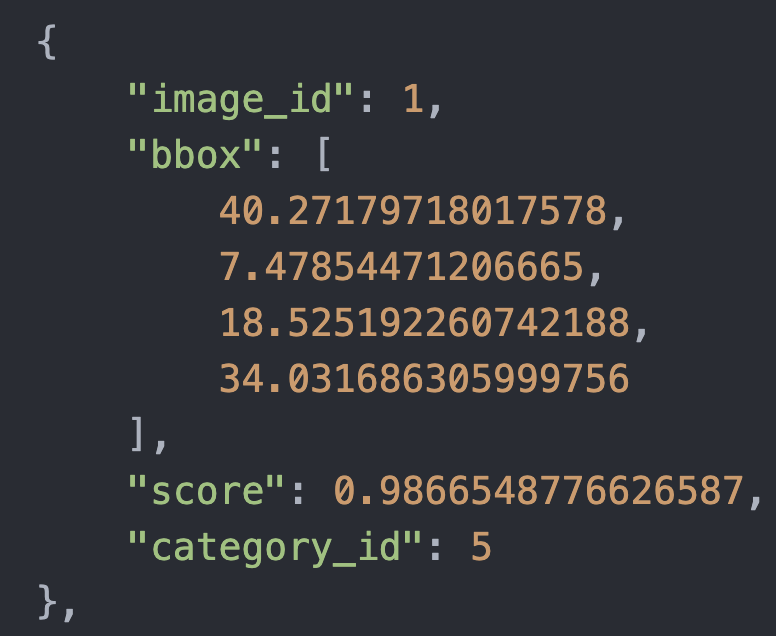

### Pseudo code for generating submission file


In [ ]:
%cd /content/NYCU_VRDL_HW2/
!make reproduce


串流輸出內容已截斷至最後 5000 行。
  inflating: datasets/Digits/test/490269.png  
  inflating: datasets/Digits/test/444986.png  
  inflating: datasets/Digits/test/455653.png  
  inflating: datasets/Digits/test/474845.png  
  inflating: datasets/Digits/test/483573.png  
  inflating: datasets/Digits/test/1698.png  
  inflating: datasets/Digits/__MACOSX/test/._1698.png  
  inflating: datasets/Digits/test/310632.png  
  inflating: datasets/Digits/test/22102.png  
  inflating: datasets/Digits/test/291338.png  
  inflating: datasets/Digits/test/359554.png  
  inflating: datasets/Digits/test/103184.png  
  inflating: datasets/Digits/test/491605.png  
  inflating: datasets/Digits/test/3931.png  
  inflating: datasets/Digits/__MACOSX/test/._3931.png  
  inflating: datasets/Digits/test/295638.png  
  inflating: datasets/Digits/test/245169.png  
  inflating: datasets/Digits/test/417312.png  
  inflating: datasets/Digits/test/12994.png  
  inflating: datasets/Digits/test/470362.png  
  inflating: datasets/Digit

In [47]:
!head answer.json

[
    {
        "image_id": 117,
        "bbox": [
            54.29413986206055,
            10.79531192779541,
            13.960155487060547,
            26.499221801757812
        ],
        "score": 0.759765625,
